# Demo 1: Share single Raster with ArcGIS Image Server REST admin API

In [2]:
import requests
import getpass
import json

## Generate Server admin token

### Generate Server token when federated with ArcGIS Portal
https://developers.arcgis.com/rest/users-groups-and-items/generate-token.htm

### Generate Server token for standalone ArcGIS Server
https://developers.arcgis.com/rest/enterprise-administration/server/generatetoken.htm

In [49]:
# Create portal token if Server is federated with ArcGIS Enterprise
portal_sharing_url = "https://valyria.esri.com/portal/sharing/rest"

# Use server admin URL if Server is a standalone ArcGIS Server
server_url = "https://valyria.esri.com/server"
server_admin_url = "https://valyria.esri.com/server/admin"

username = input("Admin username: ")
password = getpass.getpass("Admin password: ")


# Generate publishing token (Federated Server)
gentokenurl = portal_sharing_url + "/generateToken"
params = {"f": "json", "username": username, "password": password, "expiration": "20", "client": "referer", "referer": server_url}


# Generate publishing token (Standalone Server)
# gentokenurl = server_admin_url + "/generateToken"
# params = {"f": "json", "username": username, "password": password, "expiration": "20", "client": "referer", "referer": server_url}


r = requests.post(gentokenurl, data=params, verify=False)
token = json.loads(r.text)["token"]

print(token)

Admin username: admin
Admin password: ········


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


KbJqV9X_1ZORhbEaUiXWZGOC-KsZZY16vZU-DaUdfYe6UH_70TPvmhMjt0rpqj-_2dGyDqcv2mHotiyTENB-k5s4dPmwPfoP0G-V-rNmChLuXY8shM5Nn0-Zz2LhCC7sTlHJz7_pFCWHmYPK4-ZM-y8fRgWiia5JvoOmVL-uH1o.


## Use Image Service JSON Configuration to publish

In [60]:
isdef = {
 "serviceName": "demo_singledemimage",
 "type": "ImageServer",
 "description": "",
 "capabilities": "Image, Metadata, Mensuration",
 "provider": "ArcObjects11",
 "clusterName": "default",
 "minInstancesPerNode": 0,
 "maxInstancesPerNode": 2,
 "instancesPerContainer": 1,
 "maxWaitTime": 60,
 "maxStartupTime": 300,
 "maxIdleTime": 1800,
 "maxUsageTime": 600,
 "loadBalancing": "ROUND_ROBIN",
 "isolationLevel": "HIGH",
 "configuredState": "STARTED",
 "recycleInterval": 24,
 "recycleStartTime": "00:00",
 "keepAliveInterval": -1,
 "private": False,
 "isDefault": False,
 "maxUploadFileSize": 0,
 "allowedUploadFileTypes": "",
 "properties": {
  "path": "\\\\valyria\\Z__DevSummit2020\\Demo\\ManageRaster\\dem\\ned_1.tif",
  "cacheControlMaxAge": "43200",
  "colormapToRGB": "false",
  "defaultResamplingMethod": "1",
 },
 "extensions": [],
 "frameworkProperties": {},
 "datasets": []
}


## Register a fileshare data store to publish Image Service By Reference

https://developers.arcgis.com/rest/enterprise-administration/server/registerdataitem.htm

In [54]:
server_regdatastore = server_admin_url + "/data/registerItem"
print(server_regdatastore)
print(token)

fileshare = {
  "path": "/fileShares/imagedata",
  "type": "folder",
  "info": {
    "isManaged": False,
    "dataStoreConnectionType": "shared",
    "path": "\\\\valyria\\Z__DevSummit2020"
  }
}

params = {"f": "json", "token": token, "item": json.dumps(fileshare), "referer": server_url}
r = requests.post(server_regdatastore, data=params, verify=False)

print(r.text)

https://valyria.esri.com/server/admin/data/registerItem
KbJqV9X_1ZORhbEaUiXWZGOC-KsZZY16vZU-DaUdfYe6UH_70TPvmhMjt0rpqj-_2dGyDqcv2mHotiyTENB-k5s4dPmwPfoP0G-V-rNmChLuXY8shM5Nn0-Zz2LhCC7sTlHJz7_pFCWHmYPK4-ZM-y8fRgWiia5JvoOmVL-uH1o.


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{"success":true,"status":"success"}


## Use ArcGIS Server REST admin API "createService":

https://developers.arcgis.com/rest/enterprise-administration/server/createservice.htm


|Parameters|Details|
|:---|:---|
|service|The JSON representation of the service being created.|
|f|The response format. The default response format is html. <br> Values: html json pjson|

In [61]:
server_createservice = server_admin_url + "/services/createService"
print(server_createservice)
print(token)

params = {"f": "json", "token": token, "service": json.dumps(isdef), "referer": server_url}
r = requests.post(server_createservice, data=params, verify=False)

print(r.text)

https://valyria.esri.com/server/admin/services/createService
KbJqV9X_1ZORhbEaUiXWZGOC-KsZZY16vZU-DaUdfYe6UH_70TPvmhMjt0rpqj-_2dGyDqcv2mHotiyTENB-k5s4dPmwPfoP0G-V-rNmChLuXY8shM5Nn0-Zz2LhCC7sTlHJz7_pFCWHmYPK4-ZM-y8fRgWiia5JvoOmVL-uH1o.


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{"status":"success"}


## Display Image Service Layer

### Connect to your ArcGIS Enterprise

In [4]:
import arcgis
from arcgis import GIS

portal_url = "https://valyria.esri.com/portal"

username = input("Admin username: ")
password = getpass.getpass("Admin password: ")

agsEnterprise = GIS(url=portal_url, username=username, password=password, verify_cert=False)

Admin username: admin
Admin password: ········


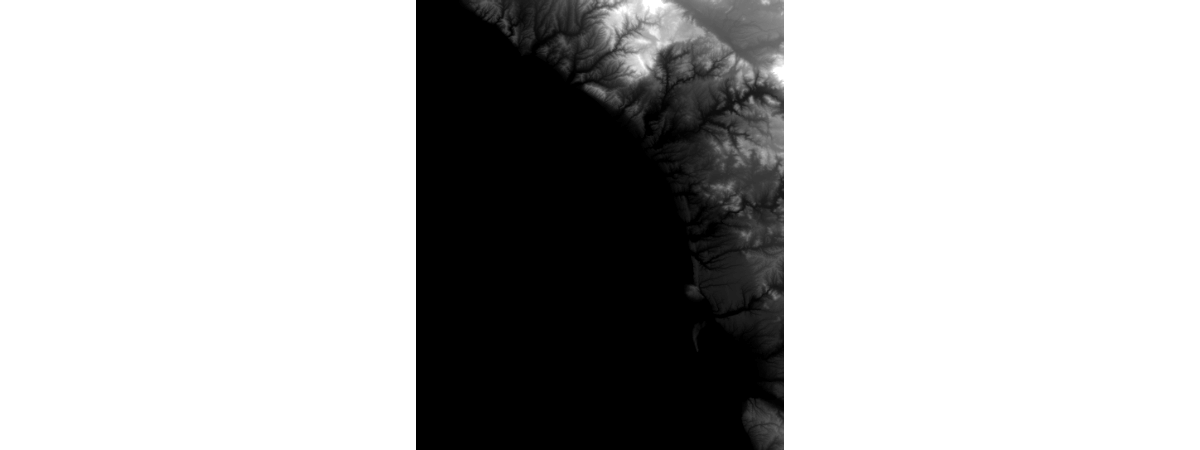

In [7]:
demis = agsEnterprise.content.search('demo_singledemimage')
demis = demis[0]
render_demis = demis.layers[0]
render_demis